<!-- ---
toc: true
comments: false
layout: post
title: Stock Simulator Graphs
description: Graphs for stock simulator
courses: { compsci: {week: 3} }
type: hacks
--- -->

| | This blog takes 8 stocks and simulates how well a portfolio would do if invested. It also tells what the best weighting for each stock would be the most optimal. It gives important information such as risk, volatility, profit, Sharpe Ratio, etc. | | 

| | 8 stocks have been chosen at random which are Intel (INTC), Ford Motor Company (F), Walt Disney Co (DIS), Tesla (TSLA), Amazon (AMZN), Bank of America (BAC), Sony (SONY), and Meta (META) | | 

| | However it shows this process visually through the use of graphs and data tables. | |

In [1]:
# Reading in the stocks of each stock and then creating a central data frame of each. 

import numpy as np
import pandas as pd
import pandas_datareader.data as web
# Get stock data  
all_data = {ticker: web.DataReader(ticker,'stooq')
           for ticker in ['INTC', 'F', 'DIS', 'TSLA', 'AMZN', 'BAC', 'SONY', 'META']}
# Extract the 'Adjusted Closing Price'
price = pd.DataFrame({ticker: data['Close']
                     for ticker, data in all_data.items() })

price

,INTC,F,DIS,TSLA,AMZN,BAC,SONY,META
Date,,,,,,,,
2023-09-08,38.0100,12.30000,81.58,248.5000,138.2300,28.3600,84.2200,297.89
2023-09-07,38.1800,11.96000,80.57,251.4900,137.8500,28.1300,85.2300,298.67
2023-09-06,36.9800,12.07000,80.98,251.9200,135.3600,28.3900,85.5000,299.17
2023-09-05,36.7100,12.09000,81.19,256.4900,137.2700,28.6500,84.5400,300.15
2023-09-01,36.6100,12.14000,81.64,245.0100,138.1200,28.9800,85.2600,296.38
...,...,...,...,...,...,...,...,...
2018-09-17,40.2749,8.33527,107.21,19.6560,95.4015,27.4898,58.1934,160.58
2018-09-14,40.3824,8.24767,107.11,19.6800,98.5095,27.5743,58.3411,162.32
2018-09-13,40.4097,8.17819,108.49,19.2973,99.4935,27.3640,56.6914,161.36


In [2]:
import matplotlib.pyplot as plt

| | This next code plots all 8 stocks on different planes on the same figure. This can be helpful for viewing each stock individually yet able to quickly see the rest of the stocks. | |

| | This code works by creating the figure, and set the figure to be broken into 8 squares (2 x 4). Then it sets the X and Y axis to be shared. Then each stock is plotted on their respective graph, set the color,  line type, and the, legend. | | 

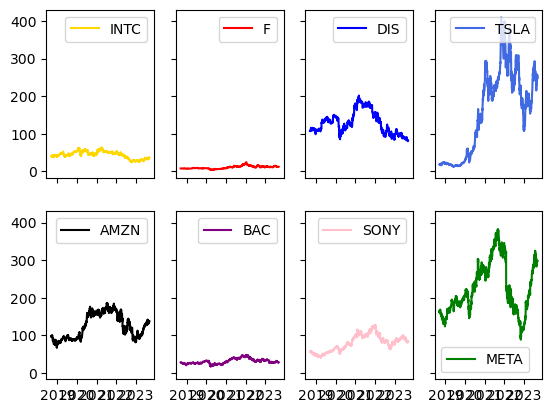

In [4]:
fig1, axes1 = plt.subplots(2,4, sharex = True, sharey = True)

axes1[0,0].plot(price['INTC'],'-', color = 'gold', label = 'INTC')
axes1[0,0].legend(loc = 'best')

axes1[0,1].plot(price['F'],'-', color = 'red', label = 'F')
axes1[0,1].legend(loc = 'best')

axes1[0,2].plot(price['DIS'],'-', color = 'blue', label = 'DIS')
axes1[0,2].legend(loc = 'best')

axes1[0,3].plot(price['TSLA'],'-', color = 'royalblue', label = 'TSLA')
axes1[0,3].legend(loc = 'best')

axes1[1,0].plot(price['AMZN'],'-', color = 'black', label = 'AMZN')
axes1[1,0].legend(loc = 'best')

axes1[1,1].plot(price['BAC'],'-', color = 'purple', label = 'BAC')
axes1[1,1].legend(loc = 'best')

axes1[1,2].plot(price['SONY'],'-', color = 'pink', label = 'SONY')
axes1[1,2].legend(loc = 'best')

axes1[1,3].plot(price['META'],'-', color = 'green', label = 'META')
axes1[1,3].legend(loc = 'best') 

# fig1.savefig('stocks1.png')

| <img src="https://i.ibb.co/yS39Zdf/stocks1.png" width = auto height = auto> |


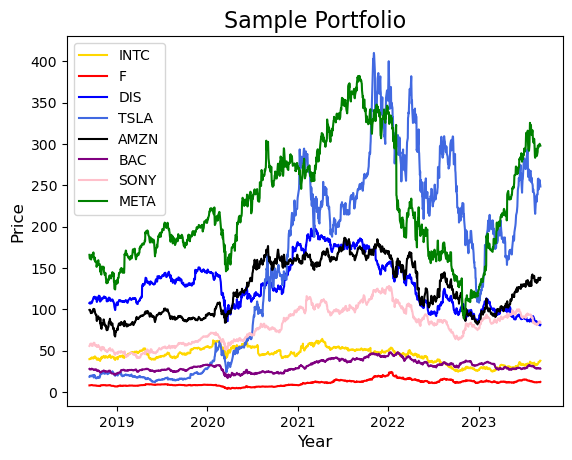

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(price['INTC'], '-',color = 'gold', label = 'INTC')
plt.plot(price['F'],'-', color = 'red', label = 'F')
plt.plot(price['DIS'],'-', color = 'blue', label = 'DIS')
plt.plot(price['TSLA'],'-', color = 'royalblue', label = 'TSLA')
plt.plot(price['AMZN'],'-', color = 'black', label = 'AMZN')
plt.plot(price['BAC'],'-', color = 'purple', label = 'BAC')
plt.plot(price['SONY'],'-', color = 'pink', label = 'SONY')
plt.plot(price['META'],'-', color = 'green', label = 'META')
ax.legend(loc = 'best')
ax.set_ylabel("Price", fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_title("Sample Portfolio", fontsize = 16)
# fig.savefig('stocks2.png')

| <img src="https://i.ibb.co/3FyyqLH/stocks2.png" width = auto height = auto > |

| | The standard deviation is how investors measure volatility and risk. STD measures the average distance from the mean, so the higher the STD the less concise the data is. In the finance world, if the STD is higher, that means that the price of the stock can be more unpredictable. This equates to risk. The lower the STD the better, and vice versa. | | 

In [8]:
# finding standard deviation
price.std()

INTC      9.271631
F         3.717336
DIS      29.862946
TSLA    112.230378
AMZN     32.588195
BAC       6.760020
SONY     21.678872
META     68.657542
dtype: float64

| | The correlation between each of the stocks shows how well the portfolio will do. The correlation in math shows the relationship and the proportion between two variables. In finance the correlation dictates how two stocks will react in relationship. In layman terms it shows if one stock will go up what will another stock do. Correlation ranges from -1 to 1, where -1 is the most optimal. | | 

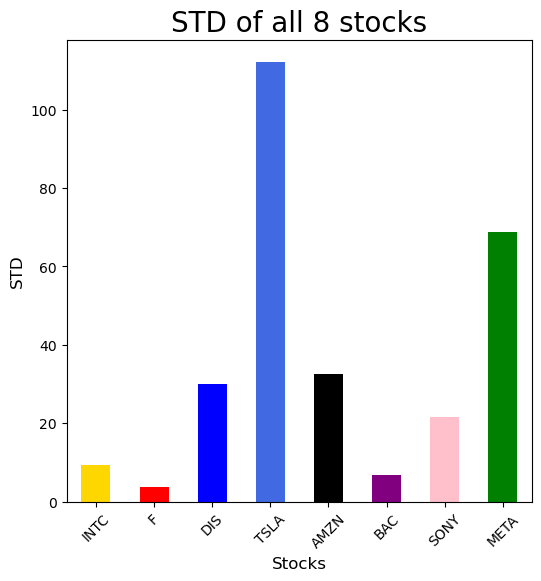

In [15]:
colors = ['gold', 'red', 'blue', 'royalblue', 'black', 'purple', 'pink', 'green']

fig6 = plt.figure(figsize=(6, 6))
axes6 = fig6.add_subplot(1, 1, 1)
priceSTD = price.std()
# Create the bar chart with custom colors
priceSTD.plot(ax=axes6, kind="bar", rot=45, color=colors)

axes6.set_ylabel("STD", fontsize=12)
axes6.set_xlabel("Stocks", fontsize=12)
axes6.set_title("STD of all 8 stocks", fontsize=20)

plt.show()

# fig6.savefig('stocks3.png')

| <img src="https://i.ibb.co/Fbg0z9p/stocks3.png" width = auto height = auto > |

In [16]:
# finding correlation of stocks
price.corr()

,INTC,F,DIS,TSLA,AMZN,BAC,SONY,META
INTC,1.000000,-0.208127,0.707272,-0.139785,0.373879,0.087796,0.101667,0.459680
F,-0.208127,1.000000,0.208047,0.827063,0.447749,0.879415,0.748847,0.377090
DIS,0.707272,0.208047,1.000000,0.238776,0.612845,0.491507,0.471521,0.641178
TSLA,-0.139785,0.827063,0.238776,1.000000,0.723475,0.743327,0.886687,0.518362
AMZN,0.373879,0.447749,0.612845,0.723475,1.000000,0.521952,0.805776,0.837410
BAC,0.087796,0.879415,0.491507,0.743327,0.521952,1.000000,0.762983,0.458293
SONY,0.101667,0.748847,0.471521,0.886687,0.805776,0.762983,1.000000,0.719643
META,0.459680,0.377090,0.641178,0.518362,0.837410,0.458293,0.719643,1.000000


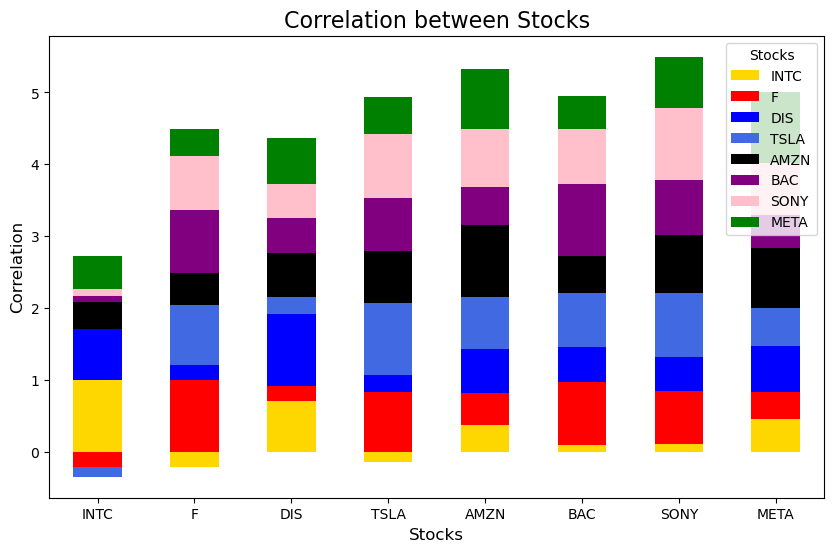

In [17]:
priceCORR = price.corr()

colors = ['gold', 'red', 'blue', 'royalblue', 'black', 'purple', 'pink', 'green']

fig, ax = plt.subplots(figsize=(10, 6))
priceCORR.plot(kind='bar', stacked=True, ax=ax, color=colors)
ax.set_ylabel("Correlation", fontsize=12)
ax.set_xlabel("Stocks", fontsize=12)
ax.set_title("Correlation between Stocks", fontsize=16)

plt.legend(title='Stocks', loc='upper right')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

# fig.savefig('stocks4.png')

| <img src="https://i.ibb.co/jDqGdXL/stocks4.png" width = auto height = auto > |

| | By finding the correlation of the entire portfolio, it will show how well it will do. The closer to -1 the better. | | 

In [18]:
# Finding average correlation to show profability of portfolio
averageCorr = price.corr()
averageCorrMean = averageCorr.mean()
averageCorrMean

column_sum = 0

# For loop to find the mean of the entire data table
for i in range(len(averageCorrMean)):
    column_sum += averageCorrMean[i]
column_sum = column_sum/len(averageCorrMean)
column_sum

0.5720103203499337

| | This is where the math and the real fun begins. This next code finds the optimal weights of each stock. It does this by running through 6000 differnt scenarios each with different weighting. It finds the weights by finding the retention factor and the volatility of each stock and then compare it to each of the other 7 stocks. Then once it has done that it'll compare it to average yearly stock prices where it will then compare all 6000 scenarios and output the most optimal. | | 

In [19]:
# finding weights, return, volitilty, and sharpe ratio. 

stocks = pd.concat([price['INTC'], price['F'], price['DIS'], price['TSLA'], price['AMZN'], price['BAC'], price['SONY'], price['META']], axis = 1)
log_ret = np.log(stocks/stocks.shift(1))

# setting up variables
np.random.seed(42)
num_ports = 6000
num_stocks = 8
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

# going through all possible weights
for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(num_stocks))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (log_ret.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

| | The Sharpe Ratio is how investors determine the profability of a portfolio in a single number that can be compared to other portfolios. In finance, the Sharpe ratio measures the performance of an investment such as a security or portfolio compared to a risk-free asset, after adjusting for its risk. | | 

In [20]:
# printing the max sharpe ratio
print("Max Sharpe Ratio = ",sharpe_arr.max())
sharpe_arr.argmax()
max_sr_ret =  ret_arr[sharpe_arr.argmax()]
max_sr_vol =  vol_arr[sharpe_arr.argmax()]

Max Sharpe Ratio =  -0.012687474431392547


| | This is my favorite and probably the most important graph. It may not look like it but there are 6000 points on this graph. Each point represents one of the possible portfolios that the code simulated to find the most optimal weightings. It graphs this by volatilty by return. The graph also represents the Sharpe Ratio of each possible portfolio. With all these calculations in mind, it finds the most opitmal portfolio and then highlights in red (the red dot). In finance this graph is part of a larger graph is called a efficient frontier. | | 

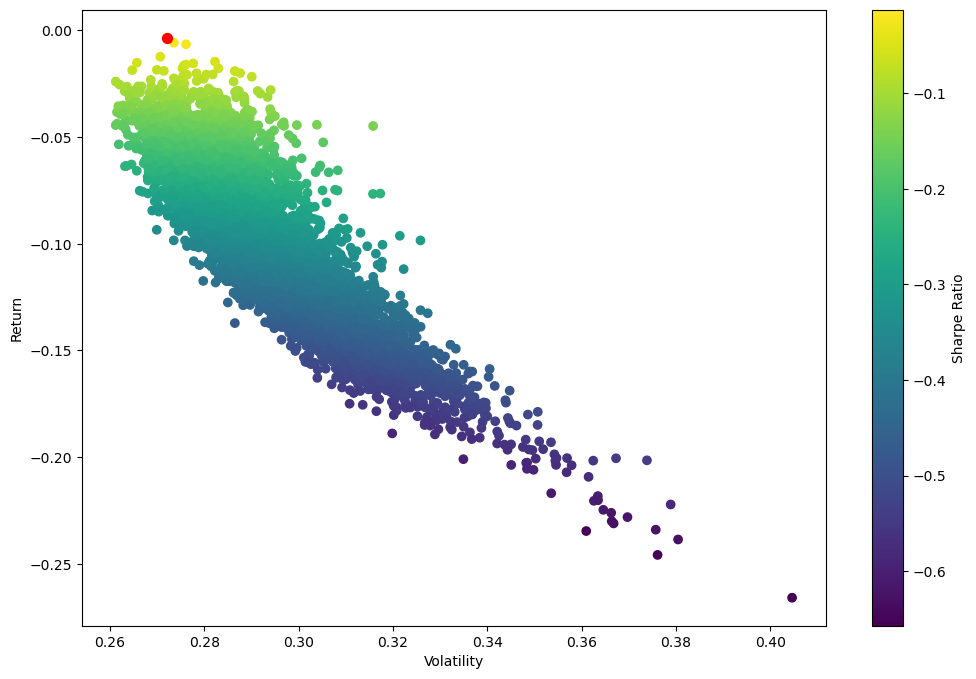

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot

# plt.savefig('stocks5.png')

| <img src="https://i.ibb.co/MMRhs07/stocks5.png" width = auto height = auto > |



<script src="https://utteranc.es/client.js"
        repo="student2"
        issue-term="pathname"
        theme="github-light"
        crossorigin="anonymous"
        async>
</script> 